# Calculating UTCI heat index in Python

## Numbers

In [2]:
import pymeteosalute

In [3]:
t = 35
rh = 0.8
wind = 10
tmrt = t
pymeteosalute.utci(t, rh, wind, tmrt)

32.26525265155691

## Numpy arrays

In [4]:
import numpy as np

In [5]:
t = np.array([35]*9).reshape(3,3)
rh = np.array([0.8]*9).reshape(3,3)
wind = np.array([10]*9).reshape(3,3)
tmrt = t

In [6]:
pymeteosalute.utci(t, rh, wind, tmrt)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
utci_v = np.vectorize(pymeteosalute.utci)

In [11]:
utci_v(t, rh, wind, tmrt)

array([[32.26525265, 32.26525265, 32.26525265],
       [32.26525265, 32.26525265, 32.26525265],
       [32.26525265, 32.26525265, 32.26525265]])

## Iris cubes

In [7]:
import iris

In [8]:
tas = iris.load_cube("data/UKCP/tasmax_regional/tasmax_rcp85_land-cpm_uk_region_05_day_19801201-19901130.nc", iris.Constraint(ensemble_member=5))
hurs = iris.load_cube("data/UKCP/hurs_regional/hurs_rcp85_land-cpm_uk_region_05_day_19801201-19901130.nc", iris.Constraint(ensemble_member=5))
sfwind = iris.load_cube("data/UKCP/sfcWind_regional/sfcWind_rcp85_land-cpm_uk_region_05_day_19801201-19901130.nc", iris.Constraint(ensemble_member=5))

In [12]:
utci_v(tas, hurs, sfwind, tas)

TypeError: '<' not supported between instances of 'Cube' and 'float'

In [13]:
utci = utci_v(tas.data, hurs.data, sfwind.data, tas.data)

In [14]:
utci.max()

31.370577428202058

In [15]:
utci.min()

-99.9

## Xarray

In [16]:
import xarray as xr

In [17]:
tasx = xr.DataArray.from_iris(tas)
hursx = xr.DataArray.from_iris(hurs)
sfwindx = xr.DataArray.from_iris(sfwind)
tmrtx = tasx

In [18]:
utcix = utci_v(tasx, hursx, sfwindx, tmrtx)

In [19]:
pymeteosalute.utci(tasx, hursx, sfwindx, tmrtx)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Conclusion

- A numpy vectorised form of the function works for
    - Numpy arrays
    - Xarray arrays
- Works for cubes but only if data are passed
    - Classic case of Xarray following the grammar of Numpy and Iris inventing its own

# NB: How does UTCI with a threshold of 26 degrees compare to the plain tas

In [63]:
import matplotlib as plt

In [ ]:
def plot_ensemble(xr, dim_name="ensemble_member"):
    es, = cube.coord(dim_name).shape
    for i in range(0, es):
        qplt.plot(cube[i], 'o', alpha=0.2)

In [20]:
xa = xr.zeros_like(tasx)
xa

<xarray.DataArray 'tasmax' (time: 3600, region: 16)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * time                (time) object 1980-12-01 12:00:00 ... 1990-11-30 12:0...
  * region              (region) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    ensemble_member     int64 ...
    ensemble_member_id  <U26 ...
    month_number        (time) int32 ...
    year                (time) int32 ...
    yyyymmdd            (time) <U64 ...
    geo_region          (region) <U24 ...
Attributes:
    standard_name:   air_temperature
    long_name:       Maximum air temperature
    units:           degC
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-08-15T09:44:03
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    institution_id:  MOHC
    project:         UKCP18
    references:      https://ukclimateprojections.metoffice.gov.uk
    resolution:      region
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5
    description:     Maximum air temperature
    label_units:     °C
    plot_label:      Maximum air temperature at 1.5m (°C)
    cell_methods:    time: mean

In [21]:
utcix

array([[ -1.56420849,  -3.97732042,  -4.54867282, ...,   2.17938914,
          3.88049072,  -0.53916059],
       [  0.87761692,   0.13220643,  -2.45928252, ...,   4.02507341,
          3.40359582,   3.00881459],
       [ -2.04381153,   0.79268123,  -1.84176213, ...,   3.4879227 ,
          2.64112144,   0.45696416],
       ...,
       [ -2.77932926,  -0.31245487,  -9.80120542, ...,  -6.53930631,
         -8.30111638,  -3.06958064],
       [ -6.42632991,  -5.29770606,  -8.58852674, ...,  -9.09895337,
         -6.44980484,  -5.33944001],
       [-15.18437606,  -9.21064637, -11.90502427, ..., -15.13099254,
         -9.33118154, -15.94469189]])

In [22]:
xa.data = utcix.data

In [23]:
xa

<xarray.DataArray 'tasmax' (time: 3600, region: 16)>
array([[ -1.56420849,  -3.97732042,  -4.54867282, ...,   2.17938914,
          3.88049072,  -0.53916059],
       [  0.87761692,   0.13220643,  -2.45928252, ...,   4.02507341,
          3.40359582,   3.00881459],
       [ -2.04381153,   0.79268123,  -1.84176213, ...,   3.4879227 ,
          2.64112144,   0.45696416],
       ...,
       [ -2.77932926,  -0.31245487,  -9.80120542, ...,  -6.53930631,
         -8.30111638,  -3.06958064],
       [ -6.42632991,  -5.29770606,  -8.58852674, ...,  -9.09895337,
         -6.44980484,  -5.33944001],
       [-15.18437606,  -9.21064637, -11.90502427, ..., -15.13099254,
         -9.33118154, -15.94469189]])
Coordinates:
  * time                (time) object 1980-12-01 12:00:00 ... 1990-11-30 12:0...
  * region              (region) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    ensemble_member     int64 ...
    ensemble_member_id  <U26 ...
    month_number        (time) int32 ...
    year                (time) int32 ...
    yyyymmdd            (time) <U64 ...
    geo_region          (region) <U24 ...
Attributes:
    standard_name:   air_temperature
    long_name:       Maximum air temperature
    units:           degC
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-08-15T09:44:03
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    institution_id:  MOHC
    project:         UKCP18
    references:      https://ukclimateprojections.metoffice.gov.uk
    resolution:      region
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5
    description:     Maximum air temperature
    label_units:     °C
    plot_label:      Maximum air temperature at 1.5m (°C)
    cell_methods:    time: mean

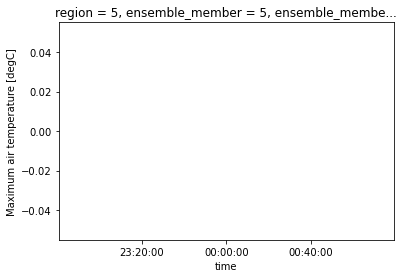

In [28]:
xa.where(xa.data>26).sel(region=5).plot()

In [84]:
xa.where(xa.data>26).groupby('year').count()

<xarray.DataArray 'tasmax' (year: 11, region: 16)>
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Coordinates:
  * region              (region) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    ensemble_member     int64 ...
    ensemble_member_id  <U26 ...
    geo_region          (region) <U24 ...
  * year                (year) int64 1980 1981 1982 1983 ... 1987 1988 1989 1990

In [34]:
tasx.where(tasx.data>25).groupby('year').count()

<xarray.DataArray 'tasmax' (year: 11, region: 16)>
array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  3,  0,  6,  1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  0,  4,  0,  0,  1,  3,  2,  3,  0,  0,  2,  0,  0,  1],
       [ 9, 12,  1, 15,  3,  0,  4,  7,  4,  6,  0,  5,  5,  0,  0,  2],
       [ 8, 11,  0, 22,  0,  0,  0, 10,  5, 10,  0,  0,  7,  0,  0,  1],
       [ 9,  9,  0, 27,  0,  0,  2, 12, 12,  9,  0,  2,  5,  0,  1,  4],
       [ 1,  4,  0, 10,  0,  0,  0,  5,  0,  1,  0,  1,  2,  0,  0,  0],
       [ 2,  3,  0,  5,  0,  0,  0,  4,  0,  4,  0,  0,  1,  0,  0,  0],
       [ 7, 16,  0, 30,  0,  0,  0, 13,  1,  3,  0,  0,  4,  0,  0,  0],
       [ 4,  8,  0, 16,  0,  0,  0,  9,  2,  3,  0,  2,  2,  0,  0,  0]])
Coordinates:
  * region              (region) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    ensemble_member     int64 ...
    ensemble_member_id  <U26 ...
    geo_region          (region) <U24 ...
  * year                (year) int64 1980 1981 1982 1983 ... 1987 1988 1989 1990

In [38]:
lon = tasx.sel(region=4)

In [40]:
lon.where(lon>26).groupby("year").count()

<xarray.DataArray 'tasmax' (year: 11)>
array([ 0,  1,  0,  4,  9, 13, 15,  5,  5, 19,  9])
Coordinates:
    region              int32 4
    ensemble_member     int64 5
    ensemble_member_id  <U26 'HadREM3-RA11M-r001i1p01554'
    geo_region          <U24 'London'
  * year                (year) int64 1980 1981 1982 1983 ... 1987 1988 1989 1990

In [47]:
lon>25

<xarray.DataArray 'tasmax' (time: 3600)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * time                (time) object 1980-12-01 12:00:00 ... 1990-11-30 12:0...
    region              int32 4
    ensemble_member     int64 ...
    ensemble_member_id  <U26 ...
    month_number        (time) int32 ...
    year                (time) int32 ...
    yyyymmdd            (time) <U64 ...
    geo_region          <U24 ...

In [58]:
condition = np.array([False,True,True,True,False,False,True,True,False,True])
# condition = lon.data>25
np.diff(np.where(np.concatenate(([condition[0]],
                                     condition[:-1] != condition[1:],
                                     [True])))[0])[::2]

array([3, 2, 1])

In [73]:
import itertools
def consecutive(arr):
    out = np.array([ sum( 1 for _ in group ) for key, group in itertools.groupby( arr ) if key ])
    return out

def consecutive_gt(arr, threshold):
    return consecutive(arr>threshold)

def consecutive_lt(arr, threshold):
    return consecutive(arr<threshold)

def consecutive_ge(arr, threshold):
    return consecutive(arr>=threshold)

def consecutive_le(arr, threshold):
    return consecutive(arr<=threshold)

In [71]:
consecutive(condition)

array([3, 2, 1])

In [76]:
%%time
consecutive_gt(lon,25)

CPU times: user 10.4 s, sys: 294 ms, total: 10.7 s
Wall time: 10.7 s


array([ 1,  2,  3,  1,  3,  1,  1,  7,  3,  2,  1,  2,  1,  2,  4,  1,  3,
        3,  1,  1,  4,  1,  2,  2,  2,  4,  3,  2,  1, 10,  1,  1,  3,  2,
        1,  1,  1,  3,  2,  2,  1,  1,  1,  1,  5,  2,  6,  5,  1,  1,  3,
        1,  2,  2,  2,  4,  1,  1,  1,  3])

In [75]:
%%time
condition = lon.data>25
np.diff(np.where(np.concatenate(([condition[0]],
                                     condition[:-1] != condition[1:],
                                     [True])))[0])[::2]

CPU times: user 488 µs, sys: 325 µs, total: 813 µs
Wall time: 812 µs


array([ 1,  2,  3,  1,  3,  1,  1,  7,  3,  2,  1,  2,  1,  2,  4,  1,  3,
        3,  1,  1,  4,  1,  2,  2,  2,  4,  3,  2,  1, 10,  1,  1,  3,  2,
        1,  1,  1,  3,  2,  2,  1,  1,  1,  1,  5,  2,  6,  5,  1,  1,  3,
        1,  2,  2,  2,  4,  1,  1,  1,  3])

In [90]:
def np_consecutive(arr):
    if isinstance(arr, xr.DataArray):
        data = arr.data
    else:
        data = arr
    out = np.diff(np.where(np.concatenate(([data[0]],
                                     data[:-1] != data[1:],
                                     [True])))[0])[::2]
    return out

def np_consecutive_gt(arr, threshold):
    return np_consecutive(arr>threshold)

def np_consecutive_lt(arr, threshold):
    return np_consecutive(arr<threshold)

def np_consecutive_ge(arr, threshold):
    return np_consecutive(arr>=threshold)

def np_consecutive_le(arr, threshold):
    return np_consecutive(arr<=threshold)

In [91]:
np_consecutive(lon>25)

array([ 1,  2,  3,  1,  3,  1,  1,  7,  3,  2,  1,  2,  1,  2,  4,  1,  3,
        3,  1,  1,  4,  1,  2,  2,  2,  4,  3,  2,  1, 10,  1,  1,  3,  2,
        1,  1,  1,  3,  2,  2,  1,  1,  1,  1,  5,  2,  6,  5,  1,  1,  3,
        1,  2,  2,  2,  4,  1,  1,  1,  3])

In [92]:
np_consecutive_gt(lon, 25)

array([ 1,  2,  3,  1,  3,  1,  1,  7,  3,  2,  1,  2,  1,  2,  4,  1,  3,
        3,  1,  1,  4,  1,  2,  2,  2,  4,  3,  2,  1, 10,  1,  1,  3,  2,
        1,  1,  1,  3,  2,  2,  1,  1,  1,  1,  5,  2,  6,  5,  1,  1,  3,
        1,  2,  2,  2,  4,  1,  1,  1,  3])

In [107]:
lon[lon.year==1986]

<xarray.DataArray 'tasmax' (time: 360)>
array([8.137471, 7.064359, 8.247532, ..., 8.932145, 9.64201 , 9.737597],
      dtype=float32)
Coordinates:
  * time                (time) object 1986-01-01 12:00:00 ... 1986-12-30 12:0...
    region              int32 4
    ensemble_member     int64 ...
    ensemble_member_id  <U26 ...
    month_number        (time) int32 ...
    year                (time) int32 ...
    yyyymmdd            (time) <U64 ...
    geo_region          <U24 ...
Attributes:
    standard_name:   air_temperature
    long_name:       Maximum air temperature
    units:           degC
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-08-15T09:44:03
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    institution_id:  MOHC
    project:         UKCP18
    references:      https://ukclimateprojections.metoffice.gov.uk
    resolution:      region
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5
    description:     Maximum air temperature
    label_units:     °C
    plot_label:      Maximum air temperature at 1.5m (°C)
    cell_methods:    time: mean

In [136]:
heatwaves = {}
years = np.unique(lon.year)
for year in years:
    arr = lon[lon.year==year]
    data = np_consecutive_gt(arr, 25)
    heatwaves[year]=data

heatwaves

{1980: array([], dtype=int64),
 1981: array([1, 2, 3]),
 1982: array([], dtype=int64),
 1983: array([1, 3]),
 1984: array([1, 1, 7, 3, 2, 1]),
 1985: array([2, 1, 2, 4, 1, 3, 3, 1, 1, 4]),
 1986: array([ 1,  2,  2,  2,  4,  3,  2,  1, 10]),
 1987: array([1, 1, 3, 2, 1, 1, 1]),
 1988: array([3, 2]),
 1989: array([2, 1, 1, 1, 1, 5, 2, 6, 5, 1, 1, 3, 1]),
 1990: array([2, 2, 2, 4, 1, 1, 1, 3])}

In [117]:
heatwaves[1986]==2

array([False,  True,  True,  True, False, False,  True, False, False])

In [120]:
np.count_nonzero(heatwaves[1986]==12)

0

In [169]:
days = np.arange(0, 5)
heatwave_counts = {}
years = np.unique(lon.year)
for year in years:
    counts = np.zeros_like(days)
    arr = lon[lon.year==year]
    arr_hot = arr>25
    hots = np_consecutive(arr_hot)
    colds = np.count_nonzero(~arr_hot)
    counts[0]=colds
    for day in days[1:-1]:
        counts[day]=np.count_nonzero(hots==day)
    counts[-1]=np.count_nonzero(hots<=days[-1])
    
    heatwave_counts[year]=counts


heatwave_counts

{1980: array([30,  0,  0,  0,  0]),
 1981: array([354,   1,   1,   1,   3]),
 1982: array([360,   0,   0,   0,   0]),
 1983: array([356,   1,   0,   1,   2]),
 1984: array([345,   3,   1,   1,   5]),
 1985: array([338,   4,   2,   2,  10]),
 1986: array([333,   2,   4,   1,   8]),
 1987: array([350,   5,   1,   1,   7]),
 1988: array([355,   0,   1,   1,   2]),
 1989: array([330,   7,   2,   1,  10]),
 1990: array([314,   3,   3,   1,   8])}

In [157]:
heatwaves

{1980: array([], dtype=int64),
 1981: array([1, 2, 3]),
 1982: array([], dtype=int64),
 1983: array([1, 3]),
 1984: array([1, 1, 7, 3, 2, 1]),
 1985: array([2, 1, 2, 4, 1, 3, 3, 1, 1, 4]),
 1986: array([ 1,  2,  2,  2,  4,  3,  2,  1, 10]),
 1987: array([1, 1, 3, 2, 1, 1, 1]),
 1988: array([3, 2]),
 1989: array([2, 1, 1, 1, 1, 5, 2, 6, 5, 1, 1, 3, 1]),
 1990: array([2, 2, 2, 4, 1, 1, 1, 3])}

In [158]:
import pandas as pd

In [159]:
pd.DataFrame(heatwave_counts)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,30,354,360,356,345,338,333,350,355,330,314
1,0,1,0,1,3,4,2,5,0,7,3
2,0,1,0,0,1,2,4,1,1,2,3
3,0,1,0,1,1,2,1,1,1,1,1
4,0,0,0,0,0,2,1,0,0,0,1


In [170]:
pd.DataFrame.from_dict(heatwave_counts, orient='index')

,0,1,2,3,4
1980,30,0,0,0,0
1981,354,1,1,1,3
1982,360,0,0,0,0
1983,356,1,0,1,2
1984,345,3,1,1,5
1985,338,4,2,2,10
1986,333,2,4,1,8
1987,350,5,1,1,7
1988,355,0,1,1,2
1989,330,7,2,1,10


In [165]:
a[1:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [166]:
a[1:-1]

array([2, 3, 4, 5, 6, 7, 8])

In [167]:
a[-1]

9